<a href="https://colab.research.google.com/github/kshitiz101/EDA/blob/main/21BDS0392.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots appear inline (if using a Jupyter Notebook)
%matplotlib inline

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Auto.csv"
df = pd.read_csv(url)

# Let’s take a quick look at the data
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# Check data types and non-null counts
print("\nDataset Info:")
df.info()

# Get summary statistics for numerical columns
print("\nSummary Statistics:")
display(df.describe())

# Check for missing values in each column
print("\nMissing Values per Column:")
display(df.isnull().sum())


Dataset shape: (392, 9)

First 5 rows:


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB

Summary Statistics:


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000



Missing Values per Column:


,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
year,0
origin,0
name,0


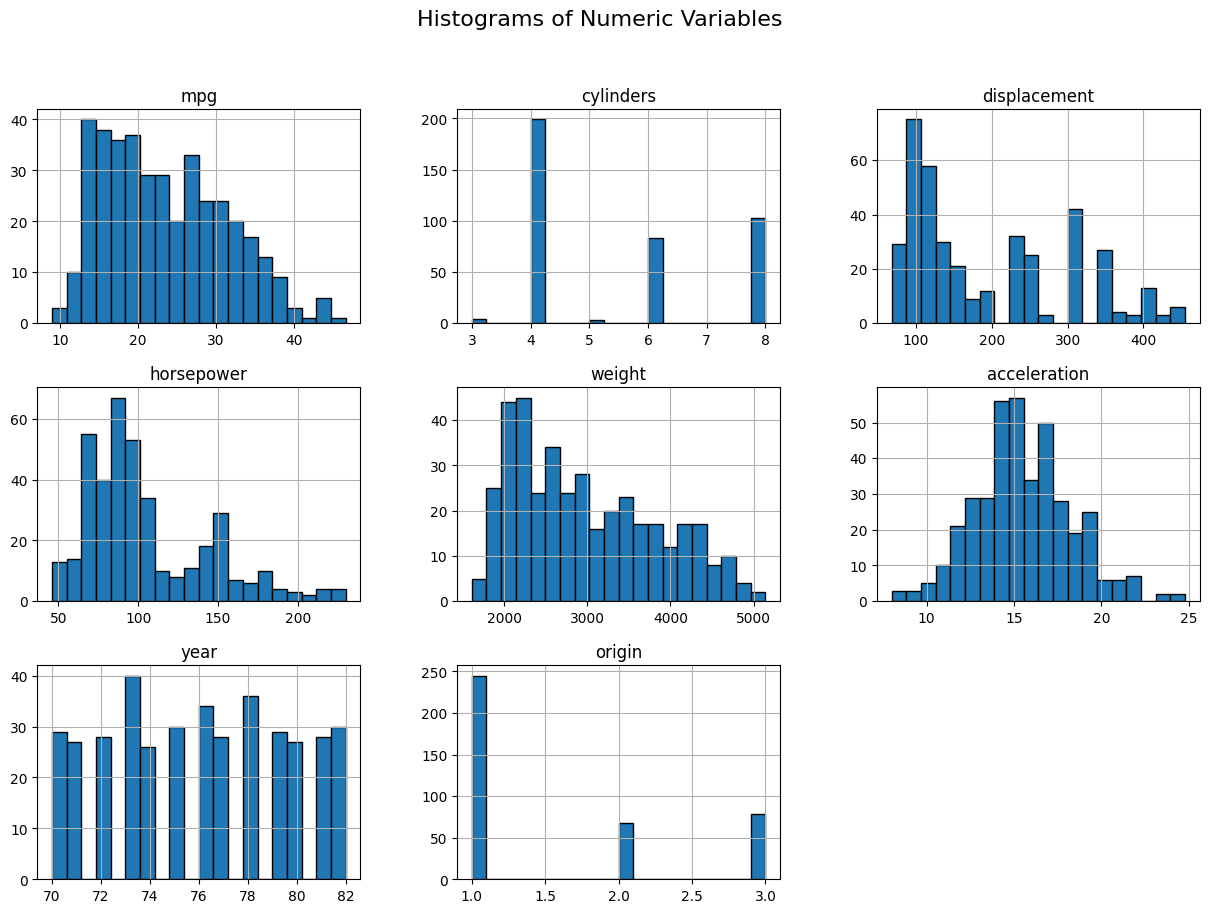

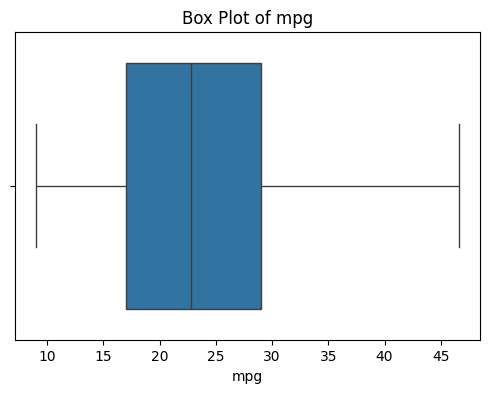

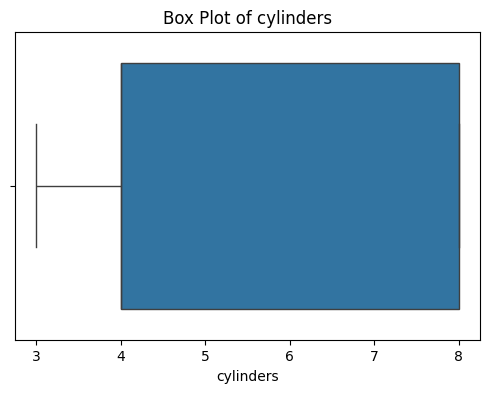

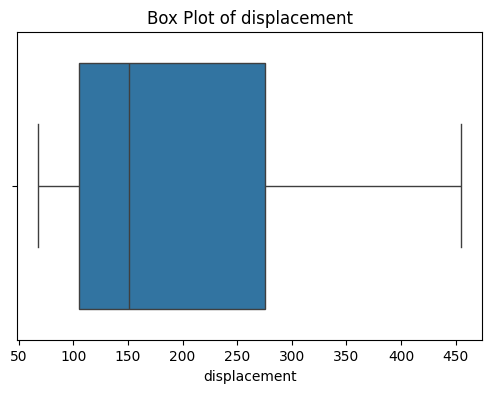

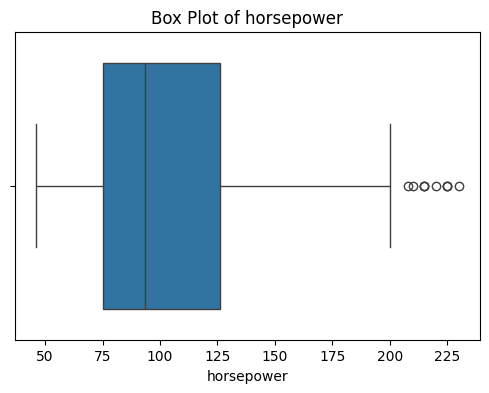

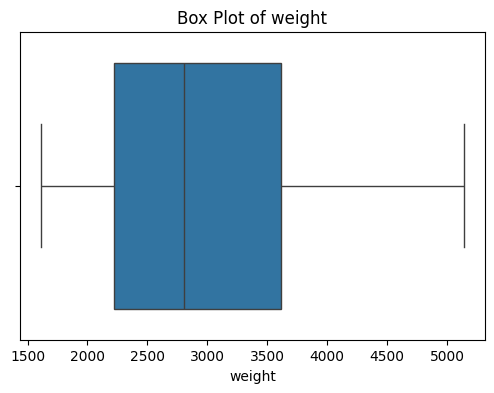

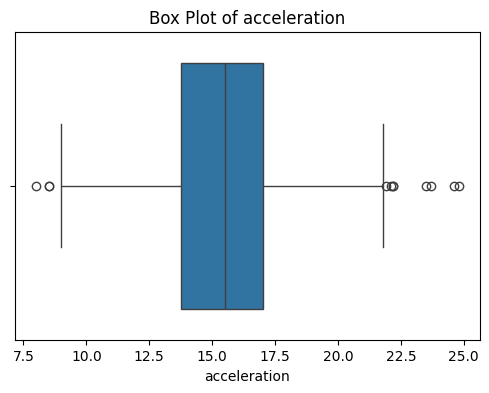

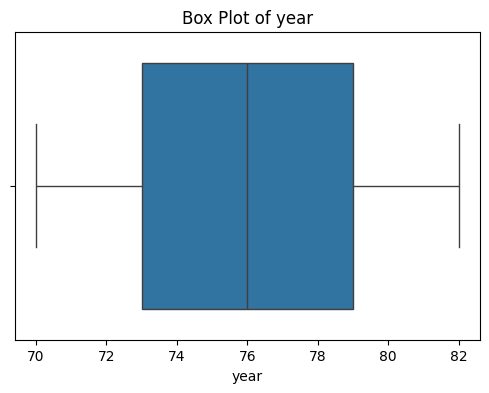

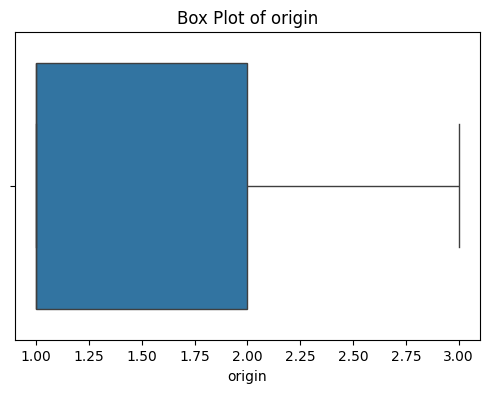

Unique values in 'cylinders': [8 4 6 3 5]
Unique values in 'origin': [1 3 2]


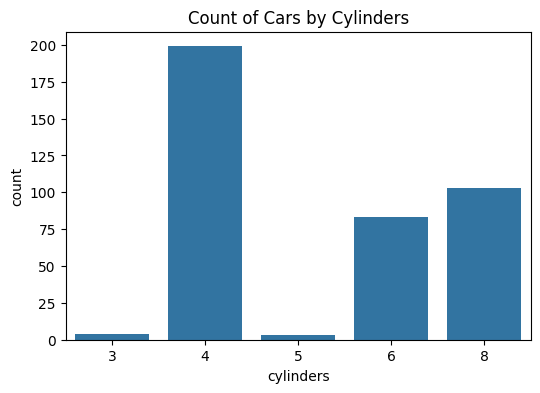

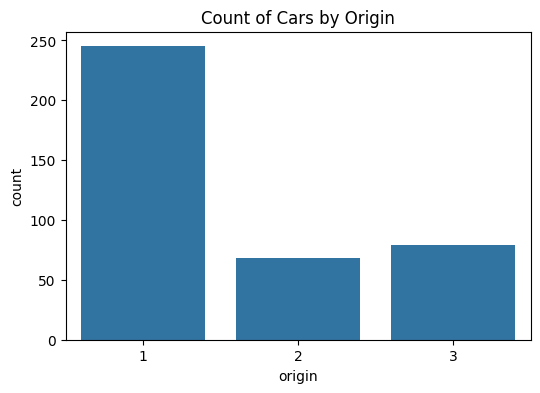

In [3]:
#Univariate Analysis

# Plot histograms for all numeric columns
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of Numeric Variables", fontsize=16)
plt.show()

# Identify numeric columns (ignoring object types like car names)
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Plot boxplots for each numeric variable
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# Check the unique values in categorical columns
print("Unique values in 'cylinders':", df['cylinders'].unique())
print("Unique values in 'origin':", df['origin'].unique())

# Count plot for cylinders
plt.figure(figsize=(6, 4))
sns.countplot(x='cylinders', data=df)
plt.title('Count of Cars by Cylinders')
plt.show()

# Count plot for origin
plt.figure(figsize=(6, 4))
sns.countplot(x='origin', data=df)
plt.title('Count of Cars by Origin')
plt.show()


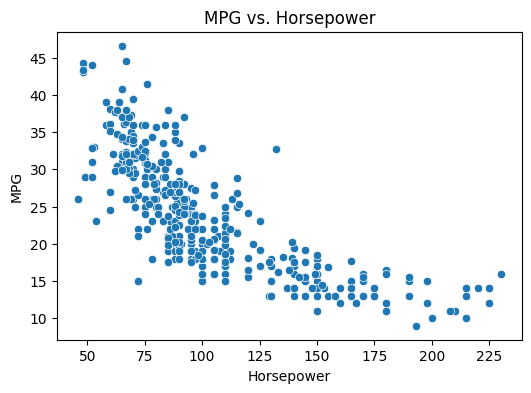

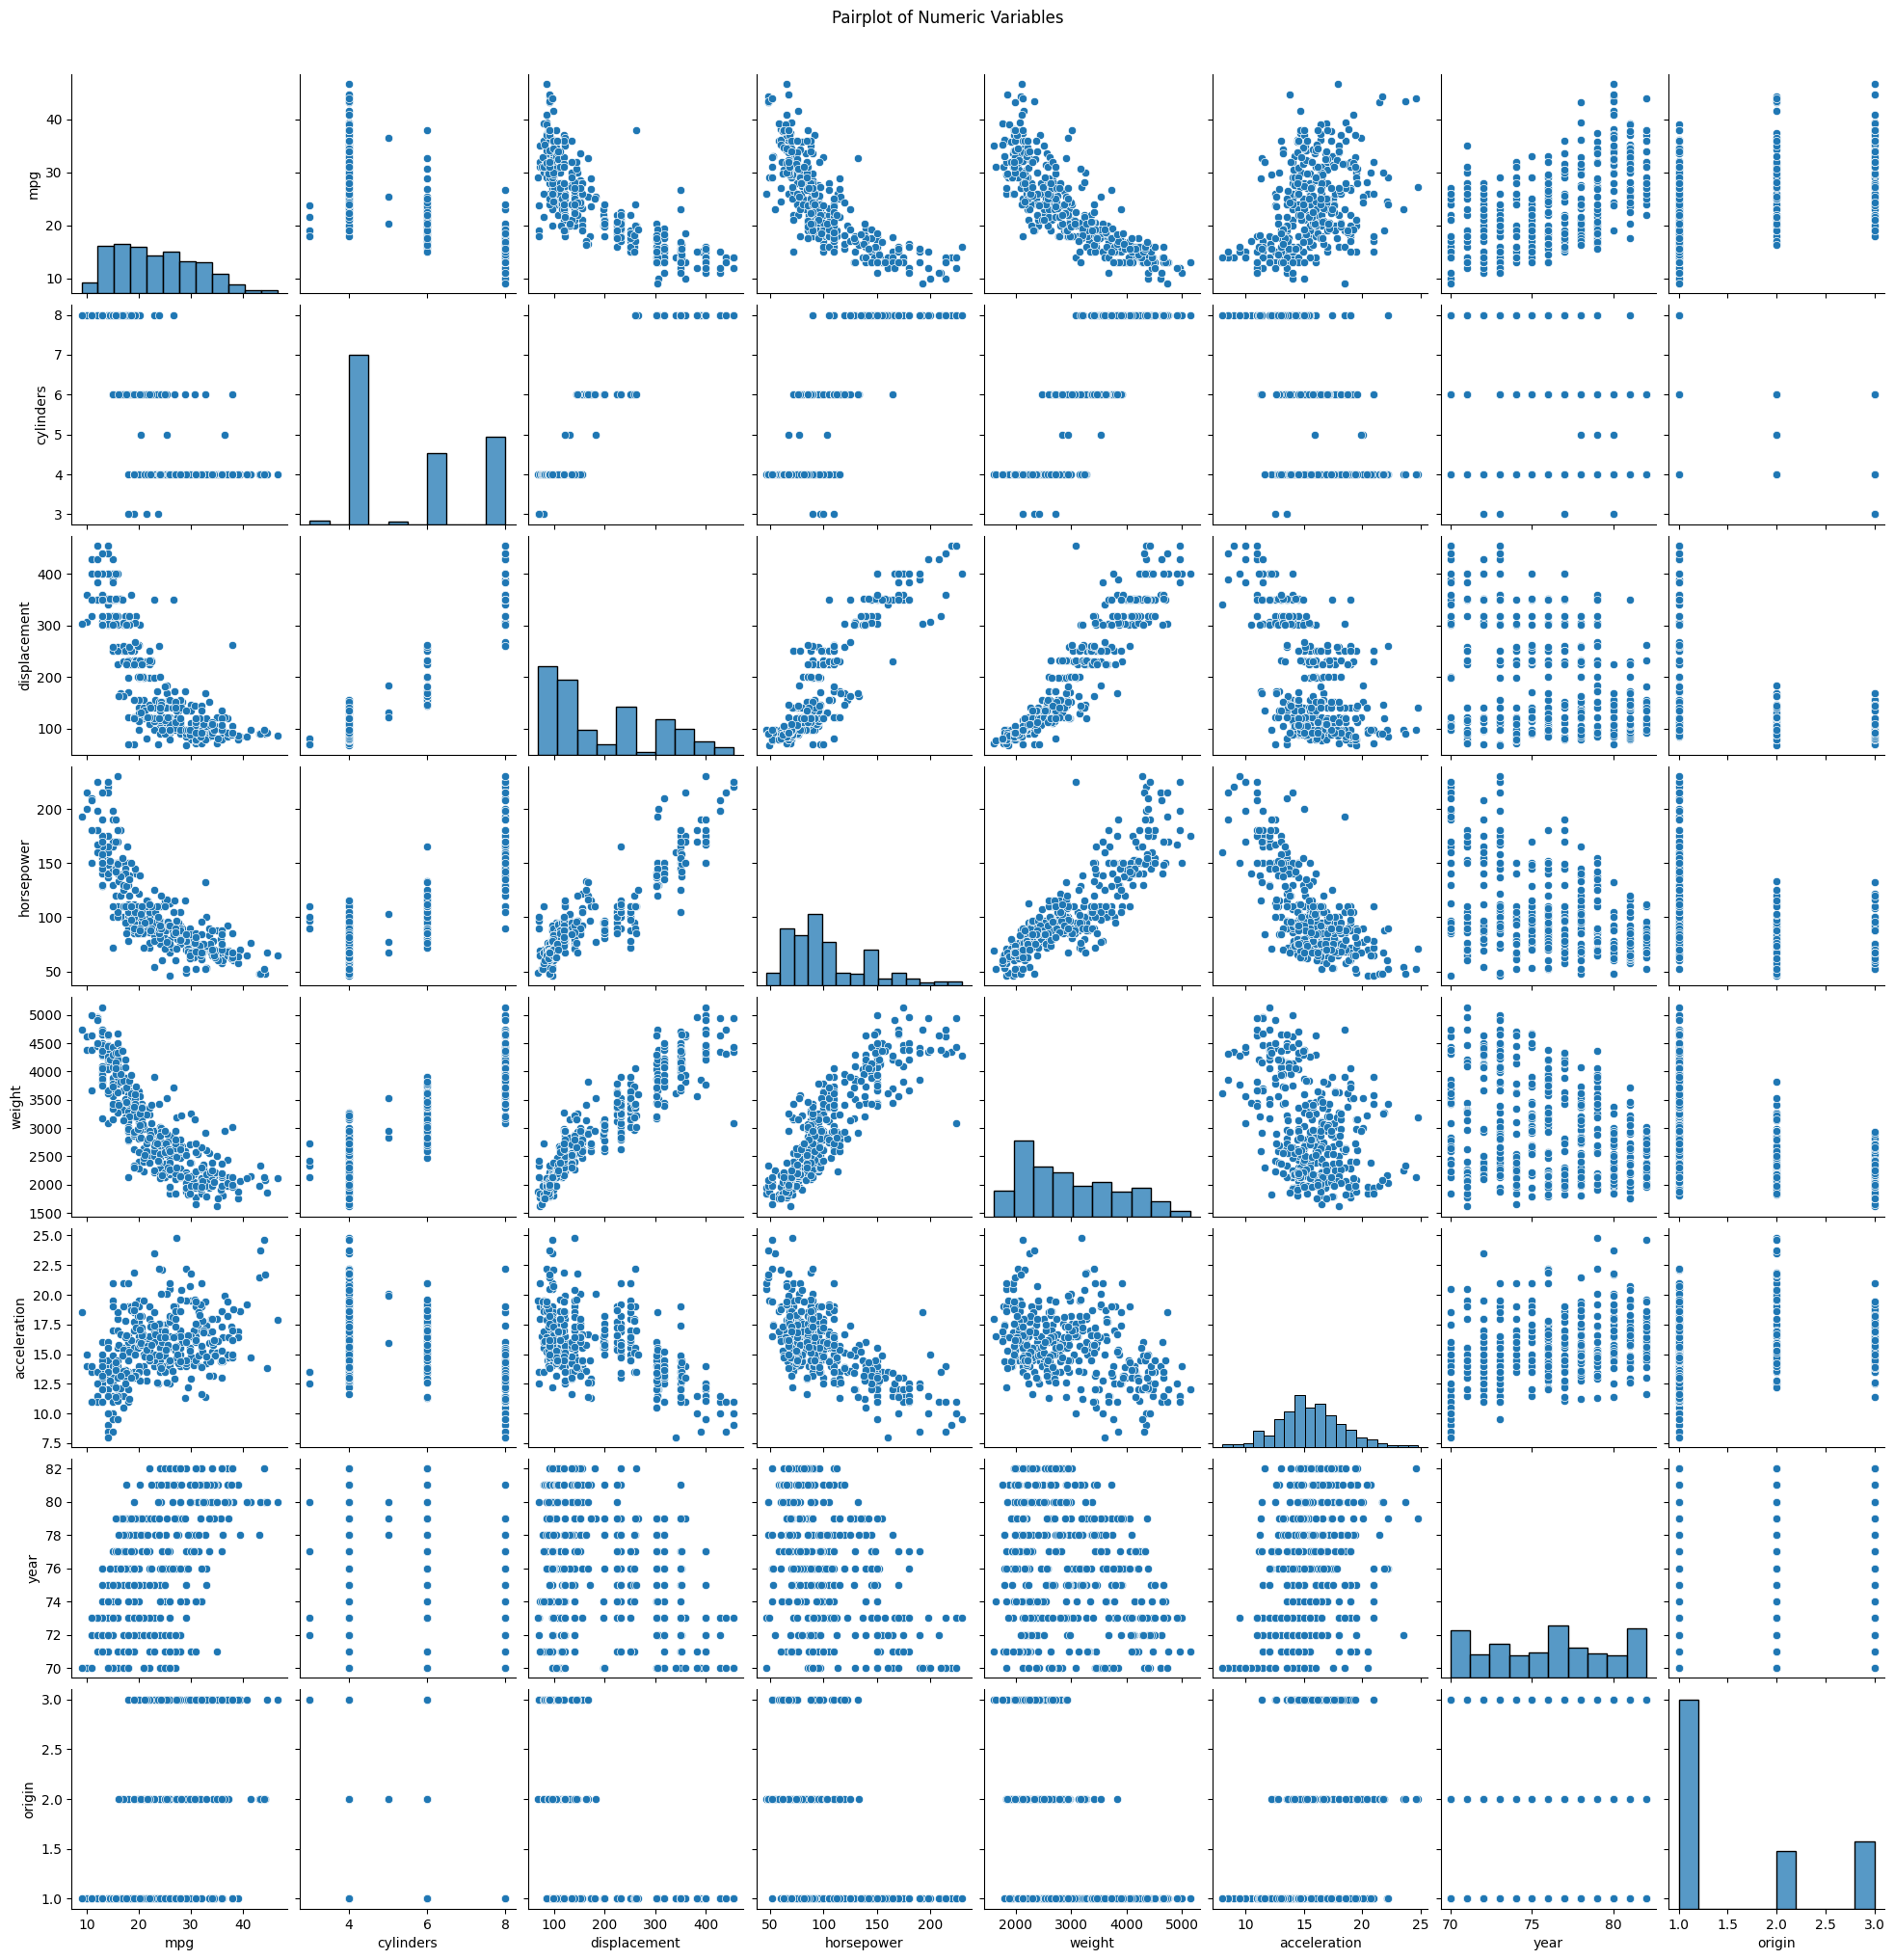

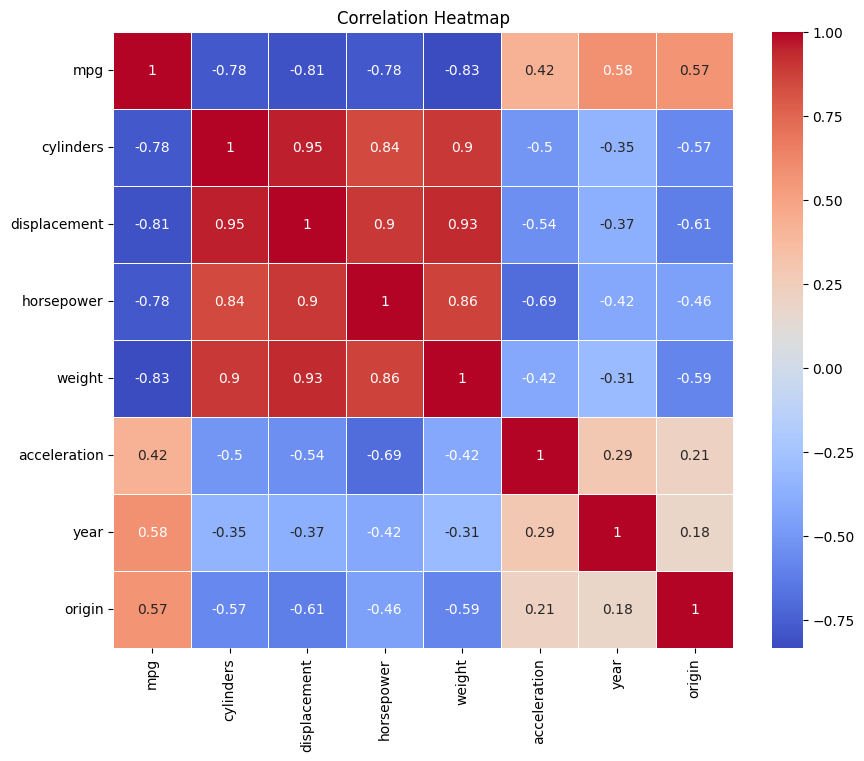

In [4]:
#Bivariate Analysis

#Scatter Plot – MPG vs. Horsepower
plt.figure(figsize=(6, 4))
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('MPG vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

#Pairplot for a Quick Multivariate Look
sns.pairplot(df[numeric_cols])
plt.suptitle("Pairplot of Numeric Variables", y=1.02)
plt.show()

#Correlation Heatmap
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



In [5]:
#Data Cleaning and Handling

#Converting Data Types

# Convert 'horsepower' to numeric, coercing errors into NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Check if conversion created any missing values
print("Missing values in 'horsepower' after conversion:", df['horsepower'].isnull().sum())

# Optionally, drop rows where 'horsepower' could not be converted
df = df.dropna(subset=['horsepower'])

#Outlier Detection Using the IQR Method

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)
    num_outliers = outlier_condition.sum()
    print(f"{col}: {num_outliers} outliers detected")



Missing values in 'horsepower' after conversion: 0
mpg: 0 outliers detected
cylinders: 0 outliers detected
displacement: 0 outliers detected
horsepower: 10 outliers detected
weight: 0 outliers detected
acceleration: 11 outliers detected
year: 0 outliers detected
origin: 0 outliers detected


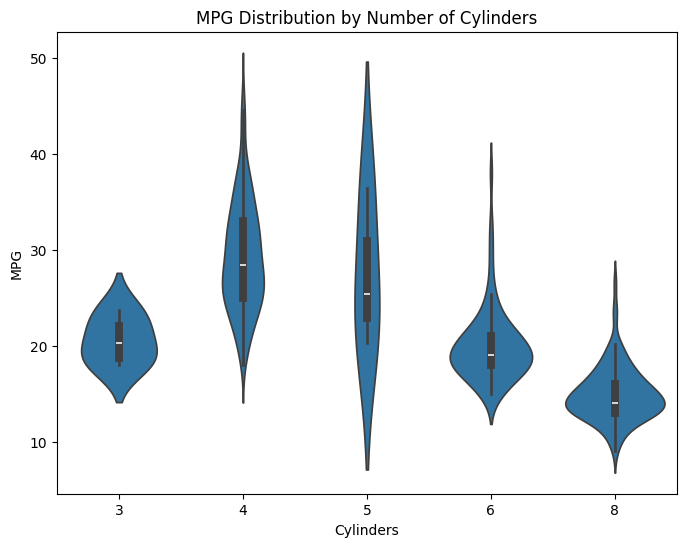

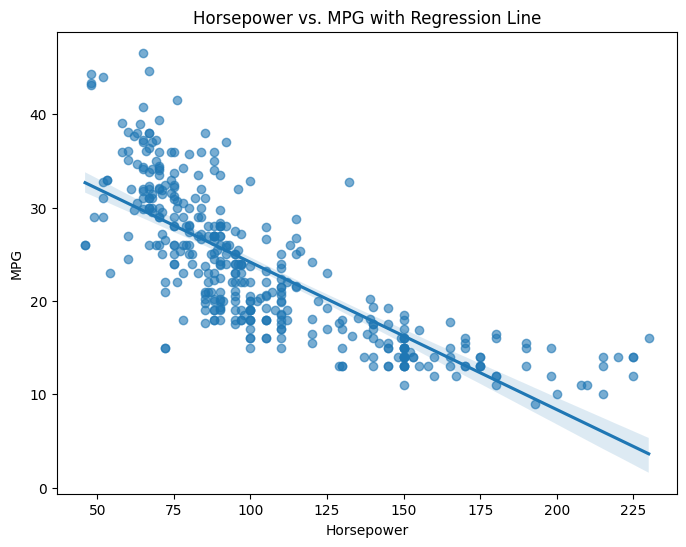

In [6]:
#Additional Visualizations

#Violin Plot – MPG Distribution by Cylinders
plt.figure(figsize=(8, 6))
sns.violinplot(x='cylinders', y='mpg', data=df)
plt.title('MPG Distribution by Number of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.show()

#Enhanced Scatter Plot with Regression Line – Horsepower vs. MPG
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=df, scatter_kws={'alpha':0.6})
plt.title('Horsepower vs. MPG with Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()


Columns in dataset: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']


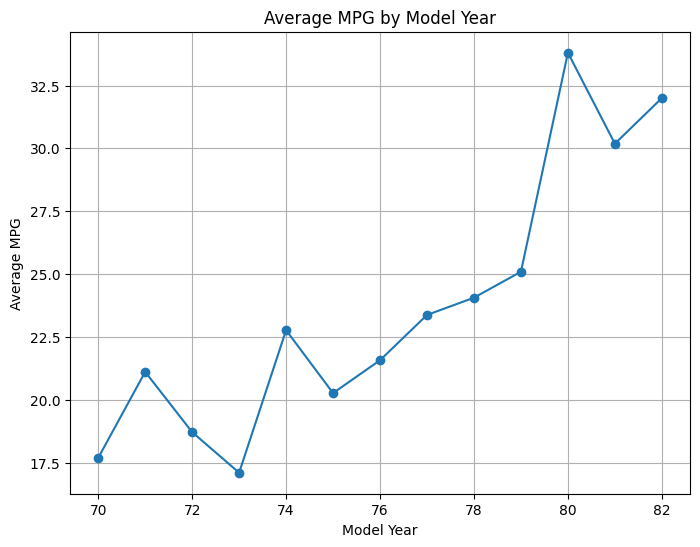

In [9]:
#Time Series Analysis

# Check available columns
print("Columns in dataset:", df.columns.tolist())

# Assuming the correct column is 'model_year' (adjust based on the output)
if 'model_year' in df.columns:
    avg_mpg_by_year = df.groupby('model_year')['mpg'].mean()
elif 'year' in df.columns:
    avg_mpg_by_year = df.groupby('year')['mpg'].mean()
else:
    raise KeyError("No appropriate column for model year found. Please verify the column names.")

# Plotting the trend
plt.figure(figsize=(8, 6))
avg_mpg_by_year.plot(marker='o')
plt.title('Average MPG by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True)
plt.show()